In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
import filterbyip as fbi
import Cdf
import Pmf

In [2]:
def write_percentiles(filename, c):
	with open(filename, 'w') as f:
		f.write('values; percentile\n')
		for x, y in zip(c.xs, c.ps):
			f.write('%.2f, %.2f\n'%(x, y))

In [3]:
def print_percentiles(c, name):
	print('-----------------------------\n')
	print('percentile values distribution for %s\n' % name)

	print('50th Percentile:%f\n' % c.Percentile(50))
	print('90th Percentile:%f\n' % c.Percentile(90))
	print('99th Percentile:%f\n' % c.Percentile(99))
	print('25th Percentile:%f\n' % c.Percentile(25))
	print('75th Percentile:%f\n' % c.Percentile(75))
	print('20th Percentile:%f\n' % c.Percentile(50))
	print('40th Percentile:%f\n' % c.Percentile(90))
	print('60th Percentile:%f\n' % c.Percentile(99))
	print('80th Percentile:%f\n' % c.Percentile(25))

	print('-----------------------------\n')

In [4]:
import warnings
warnings.filterwarnings('ignore')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [6]:
quic_data = "./AWS_results/SaoPaulo/data/output_quic.csv"

In [7]:
tcol_names = ['TimeOfMeasurement', 'Url', 'Path', 'Ip', 'Port', 'DNSTime', 'ConnectionEstablishmentTime', 'TTFB', 'TotalDownloadTime', 'HttpResponse', 'Protocol']
as_names = ['Url', 'Ip', 'ASNo','ASName','Lat','Lon'] 

In [8]:
t = pd.read_csv(quic_data,';', names=tcol_names, header=None)

In [9]:
t = t.dropna()

In [10]:
asndata = "./data/pi-1/quic_perf/asinfo.csv"

In [11]:
asn = pd.read_csv(asndata, ',', names=as_names, header=None)
asn

,Url,Ip,ASNo,ASName,Lat,Lon
0,www.google.com,172.217.19.68,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
1,www.youtube.com,172.217.22.78,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
2,www.google.co.in,216.58.213.227,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
3,www.blogspot.com,172.217.18.9,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
4,www.google.co.jp,216.58.210.3,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
...,...,...,...,...,...,...
7428,www.holidaysequences.com,35.190.16.47,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
7429,www.nickzammeti.com,130.211.40.170,15169.0,GOOGLE - Google LLC,4.35,50.8500
7430,www.redlink-network.org,35.190.35.16,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
7431,www.reefh2o.com,35.190.16.47,15169.0,GOOGLE - Google LLC,-122.0574,37.4192


In [12]:
#pd.set_option('display.max_rows', 500)
asn.groupby(['ASNo', 'ASName']).size().sort_values(ascending=False)


ASNo     ASName                                              
15169.0  GOOGLE - Google LLC                                     5040
15133.0  EDGECAST - MCI Communications Services                   557
7506.0   INTERQ GMO Internet                                      148
24940.0  HETZNER-AS - Hetzner Online GmbH                         126
16276.0  OVH - OVH SAS                                            102
                                                                 ... 
30148.0  SUCURI-SEC - Sucuri                                        1
48666.0  AS-MAROSNET - MAROSNET Telecommunication Company LLC       1
30860.0  YURTEH-AS - Virtual Systems LLC                            1
30933.0  PROTEXIA-EU - KDA WEB SERVICES LTD                         1
37907.0  DIGIROCK DigiRock                                          1
Length: 216, dtype: int64

In [13]:
asn.count()

Url       7433
Ip        7424
ASNo      7424
ASName    7424
Lat       7424
Lon       7424
dtype: int64

In [14]:
asn.head()

,Url,Ip,ASNo,ASName,Lat,Lon
0,www.google.com,172.217.19.68,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
1,www.youtube.com,172.217.22.78,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
2,www.google.co.in,216.58.213.227,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
3,www.blogspot.com,172.217.18.9,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
4,www.google.co.jp,216.58.210.3,15169.0,GOOGLE - Google LLC,-122.0574,37.4192


In [15]:
t = t.join(asn.set_index('Url'), on='Url', rsuffix='_right')

In [16]:
t = t.drop('Ip_right', axis=1)

In [17]:
t.count()

TimeOfMeasurement              719206
Url                            719206
Path                           719206
Ip                             719206
Port                           719206
DNSTime                        719206
ConnectionEstablishmentTime    719206
TTFB                           719206
TotalDownloadTime              719206
HttpResponse                   719206
Protocol                       719206
ASNo                           561180
ASName                         561180
Lat                            561180
Lon                            561180
dtype: int64

In [18]:
t.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol,ASNo,ASName,Lat,Lon
0,1.589587e+09,www.0dayrox2.blogspot.com,/,216.58.202.1,443,165.824,94.965,295.938,458.868,404.0,Q043,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
1,1.589587e+09,www.0dayrox2.blogspot.com,/,216.58.202.1,443,0.879,100.239,304.954,708.229,404.0,Q046,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
2,1.589587e+09,www.0dayrox2.blogspot.com,/,216.58.202.1,443,0.894,100.598,313.368,715.168,404.0,Q050,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
8,1.589587e+09,www.0dayrox.blogspot.com,/,216.58.202.1,443,163.712,97.075,292.238,454.798,404.0,Q043,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
9,1.589587e+09,www.0dayrox.blogspot.com,/,216.58.202.1,443,0.874,94.907,294.142,697.891,404.0,Q046,15169.0,GOOGLE - Google LLC,-122.0574,37.4192


In [19]:
def timestamp2human(timestamp):
    return datetime.datetime.fromtimestamp(int(timestamp)).strftime('%c')

In [20]:
#t['TimeOfMeasurement'] = t['TimeOfMeasurement'].apply(timestamp2human)

In [21]:
t.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol,ASNo,ASName,Lat,Lon
0,1.589587e+09,www.0dayrox2.blogspot.com,/,216.58.202.1,443,165.824,94.965,295.938,458.868,404.0,Q043,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
1,1.589587e+09,www.0dayrox2.blogspot.com,/,216.58.202.1,443,0.879,100.239,304.954,708.229,404.0,Q046,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
2,1.589587e+09,www.0dayrox2.blogspot.com,/,216.58.202.1,443,0.894,100.598,313.368,715.168,404.0,Q050,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
8,1.589587e+09,www.0dayrox.blogspot.com,/,216.58.202.1,443,163.712,97.075,292.238,454.798,404.0,Q043,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
9,1.589587e+09,www.0dayrox.blogspot.com,/,216.58.202.1,443,0.874,94.907,294.142,697.891,404.0,Q046,15169.0,GOOGLE - Google LLC,-122.0574,37.4192


In [22]:
t.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol,ASNo,ASName,Lat,Lon
2044629,1.589991e+09,www.vstrokax.net,/,208.88.226.236,443,2.102,367.459,527.913,527.983,301.0,Q050,35415.0,WEBZILLA - Webzilla B.V.,4.8995,52.3824
2044631,1.589991e+09,www.aabiertaalfonsoviii.blogspot.com,/,172.217.29.225,443,81.868,162.266,453.552,453.647,301.0,Q050,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
2044632,1.589991e+09,www.pedagogasdapaz.blogspot.com,/,172.217.29.225,443,199.852,166.587,368.815,368.885,301.0,Q043,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
2044637,1.589991e+09,www.pedagogasdapaz.blogspot.com,/,172.217.29.225,443,42.789,160.420,362.691,362.778,301.0,Q046,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
2044640,1.589991e+09,www.pedagogasdapaz.blogspot.com,/,172.217.29.225,443,85.936,168.939,369.464,369.543,301.0,Q050,15169.0,GOOGLE - Google LLC,-122.0574,37.4192


In [23]:
def filter_by_ip(df, column):
  """reads a DataFrame, calls fbi.filter_v{4,6} to get DataFrames with rows
     containing only v4, v6 endpoints. Returns the two DataFrame as a tuple"""

  dfv6 = fbi.filter_v6(df, column)
  dfv4 = fbi.filter_v4(df, column)
  return dfv4, dfv6

In [24]:
#quic4, quic6 = filter_by_ip(t, column = 'Ip')
quic4 = t[t['Ip'].str.contains("\.")]
quic6 = t[t['Ip'].str.contains("\:")]

In [25]:
quic4 = quic4[quic4['HttpResponse'] == 200.0]
quic6 = quic6[quic6['HttpResponse'] == 200.0]

In [26]:
quic4.count()

TimeOfMeasurement              160691
Url                            160691
Path                           160691
Ip                             160691
Port                           160691
DNSTime                        160691
ConnectionEstablishmentTime    160691
TTFB                           160691
TotalDownloadTime              160691
HttpResponse                   160691
Protocol                       160691
ASNo                           104052
ASName                         104052
Lat                            104052
Lon                            104052
dtype: int64

In [27]:
quic4.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol,ASNo,ASName,Lat,Lon
24,1.589587e+09,www.100negocios.com,/,66.198.240.11,443,874.597,287.670,927.895,262.651,200.0,Q043,NaN,NaN,NaN,NaN
25,1.589587e+09,www.100negocios.com,/,66.198.240.11,443,0.727,340.110,999.997,396.007,200.0,Q046,NaN,NaN,NaN,NaN
26,1.589587e+09,www.100negocios.com,/,66.198.240.11,443,1.190,289.276,918.674,269.840,200.0,Q050,NaN,NaN,NaN,NaN
120,1.589587e+09,www.1-link.org,/,78.142.29.4,443,974.984,430.008,704.252,717.761,200.0,Q043,206349.0,BLUEANGELHOST - BlueAngelHost Pvt. Ltd,23.3333,42.7
121,1.589587e+09,www.1-link.org,/,78.142.29.4,443,0.775,432.655,703.623,716.550,200.0,Q046,206349.0,BLUEANGELHOST - BlueAngelHost Pvt. Ltd,23.3333,42.7


In [28]:
quic6.count()

TimeOfMeasurement              0
Url                            0
Path                           0
Ip                             0
Port                           0
DNSTime                        0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
Protocol                       0
ASNo                           0
ASName                         0
Lat                            0
Lon                            0
dtype: int64

In [29]:
quic6.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol,ASNo,ASName,Lat,Lon


In [30]:
t.groupby(['ASNo', 'ASName']).size().sort_values(ascending=False)

ASNo      ASName                                   
15169.0   GOOGLE - Google LLC                          440791
15133.0   EDGECAST - MCI Communications Services        54610
35415.0   WEBZILLA - Webzilla B.V.                       5063
55293.0   A2HOSTING - A2 Hosting                         4869
203226.0  IHCRU - Internet-Hosting Ltd                   4448
                                                        ...  
63408.0   SHOPIFYASN2 - Shopify                            55
55720.0   GIGABIT-MY Gigabit Hosting Sdn Bhd               54
43754.0   ASIATECH - Asiatech Data Transfer Inc PLC        51
20473.0   AS-CHOOPA - Choopa                               29
47748.0   DATICUM - Daticum JSC                            27
Length: 85, dtype: int64

In [31]:
t.groupby(['ASNo', 'ASName']).size().sort_values(ascending=False)

ASNo      ASName                                   
15169.0   GOOGLE - Google LLC                          440791
15133.0   EDGECAST - MCI Communications Services        54610
35415.0   WEBZILLA - Webzilla B.V.                       5063
55293.0   A2HOSTING - A2 Hosting                         4869
203226.0  IHCRU - Internet-Hosting Ltd                   4448
                                                        ...  
63408.0   SHOPIFYASN2 - Shopify                            55
55720.0   GIGABIT-MY Gigabit Hosting Sdn Bhd               54
43754.0   ASIATECH - Asiatech Data Transfer Inc PLC        51
20473.0   AS-CHOOPA - Choopa                               29
47748.0   DATICUM - Daticum JSC                            27
Length: 85, dtype: int64

In [32]:
quic15169 = quic4.loc[t['ASNo'] == 15169]
quic15133 = quic4.loc[t['ASNo'] == 15133]
quic55293= quic4.loc[t['ASNo'] == 55293]
quic35415 = quic4.loc[t['ASNo'] == 35415]
quic203226 = quic4.loc[t['ASNo'] == 203226]

In [33]:
quic15169.count()

TimeOfMeasurement              41576
Url                            41576
Path                           41576
Ip                             41576
Port                           41576
DNSTime                        41576
ConnectionEstablishmentTime    41576
TTFB                           41576
TotalDownloadTime              41576
HttpResponse                   41576
Protocol                       41576
ASNo                           41576
ASName                         41576
Lat                            41576
Lon                            41576
dtype: int64

In [34]:
quic15133.count()

TimeOfMeasurement              32970
Url                            32970
Path                           32970
Ip                             32970
Port                           32970
DNSTime                        32970
ConnectionEstablishmentTime    32970
TTFB                           32970
TotalDownloadTime              32970
HttpResponse                   32970
Protocol                       32970
ASNo                           32970
ASName                         32970
Lat                            32970
Lon                            32970
dtype: int64

In [35]:
quic15133.count()

TimeOfMeasurement              32970
Url                            32970
Path                           32970
Ip                             32970
Port                           32970
DNSTime                        32970
ConnectionEstablishmentTime    32970
TTFB                           32970
TotalDownloadTime              32970
HttpResponse                   32970
Protocol                       32970
ASNo                           32970
ASName                         32970
Lat                            32970
Lon                            32970
dtype: int64

In [36]:
quic55293.count()

TimeOfMeasurement              2760
Url                            2760
Path                           2760
Ip                             2760
Port                           2760
DNSTime                        2760
ConnectionEstablishmentTime    2760
TTFB                           2760
TotalDownloadTime              2760
HttpResponse                   2760
Protocol                       2760
ASNo                           2760
ASName                         2760
Lat                            2760
Lon                            2760
dtype: int64

In [37]:
quic35415.count()

TimeOfMeasurement              1024
Url                            1024
Path                           1024
Ip                             1024
Port                           1024
DNSTime                        1024
ConnectionEstablishmentTime    1024
TTFB                           1024
TotalDownloadTime              1024
HttpResponse                   1024
Protocol                       1024
ASNo                           1024
ASName                         1024
Lat                            1024
Lon                            1024
dtype: int64

In [38]:
quic15169_6 = quic6.loc[t['ASNo'] == 15169]
quic15133_6 = quic6.loc[t['ASNo'] == 15133]
quic55293_6 = quic6.loc[t['ASNo'] == 55293]
quic35415_6 = quic6.loc[t['ASNo'] == 35415]
quic203226_6 = quic6.loc[t['ASNo'] == 203226]

In [39]:
quic15169_6.count()

TimeOfMeasurement              0
Url                            0
Path                           0
Ip                             0
Port                           0
DNSTime                        0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
Protocol                       0
ASNo                           0
ASName                         0
Lat                            0
Lon                            0
dtype: int64

In [40]:
quic15133.count()

TimeOfMeasurement              32970
Url                            32970
Path                           32970
Ip                             32970
Port                           32970
DNSTime                        32970
ConnectionEstablishmentTime    32970
TTFB                           32970
TotalDownloadTime              32970
HttpResponse                   32970
Protocol                       32970
ASNo                           32970
ASName                         32970
Lat                            32970
Lon                            32970
dtype: int64

In [41]:
x = Cdf.MakeCdfFromList(quic15169['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic15133['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic55293['ConnectionEstablishmentTime'].values)
x4 = Cdf.MakeCdfFromList(quic35415['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quic203226['ConnectionEstablishmentTime'].values)

In [42]:
print_percentiles(x1, 'quic15133')
print_percentiles(x3, 'quic55293')
print_percentiles(x4, 'quic35415')
print_percentiles(x5, 'quic203226')
print_percentiles(x, 'quic15169')

-----------------------------

percentile values distribution for quic15133

50th Percentile:240.631000

90th Percentile:271.942000

99th Percentile:552.169000

25th Percentile:218.998000

75th Percentile:246.132000

20th Percentile:240.631000

40th Percentile:271.942000

60th Percentile:552.169000

80th Percentile:218.998000

-----------------------------

-----------------------------

percentile values distribution for quic55293

50th Percentile:326.275000

90th Percentile:719.689000

99th Percentile:819.330000

25th Percentile:291.560000

75th Percentile:328.895000

20th Percentile:326.275000

40th Percentile:719.689000

60th Percentile:819.330000

80th Percentile:291.560000

-----------------------------

-----------------------------

percentile values distribution for quic35415

50th Percentile:409.310000

90th Percentile:450.900000

99th Percentile:758.102000

25th Percentile:405.783000

75th Percentile:447.914000

20th Percentile:409.310000

40th Percentile:450.900000

60th Pe

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


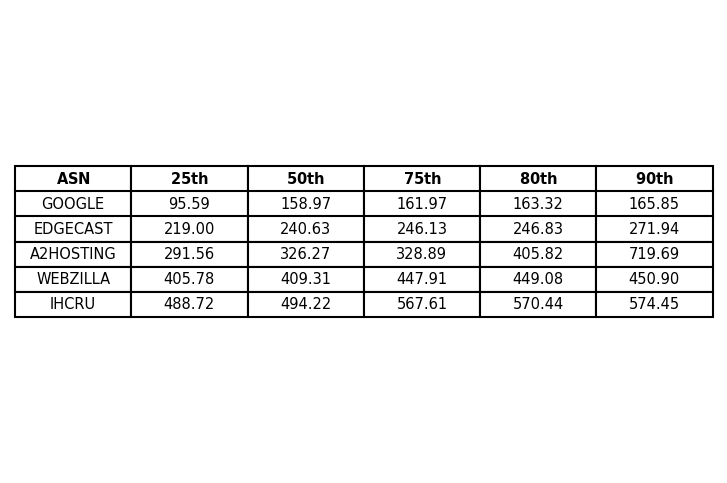

In [43]:
data = {'$\\bf{ASN}$': ['GOOGLE', 'EDGECAST', 'A2HOSTING', 'WEBZILLA', 'IHCRU'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x4.Percentile(25)), "{:.2f}".format(x5.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x4.Percentile(50)), "{:.2f}".format(x5.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x4.Percentile(75)), "{:.2f}".format(x5.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x4.Percentile(80)), "{:.2f}".format(x5.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x4.Percentile(90)), "{:.2f}".format(x5.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./AWS/SaoPaulo/ASN/handshake_times_IPv4_asno_percentile.png', format='png', bbox_inches='tight')


In [44]:
write_percentiles('quic15133.csv', x1)
write_percentiles('quic55293.csv', x3)
write_percentiles('quic35415.csv', x4)
write_percentiles('quic203226.csv', x5)
write_percentiles('quic15169.csv', x)

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


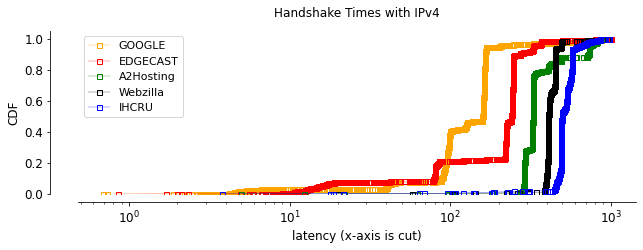

In [45]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15169
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#15133
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#55293
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#35415
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')
#203226
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
##ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['GOOGLE', 'EDGECAST', 'A2Hosting', 'Webzilla', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/SaoPaulo/ASN/handshake_times_IPv4_asno.png', format='png', bbox_inches='tight')


In [46]:
x = Cdf.MakeCdfFromList(quic15169['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic15133['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic55293['TTFB'].values)
x4 = Cdf.MakeCdfFromList(quic35415['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quic203226['TTFB'].values)

In [47]:
print_percentiles(x1, 'quic15133')
print_percentiles(x3, 'quic55293')
print_percentiles(x4, 'quic35415')
print_percentiles(x5, 'quic203226')
print_percentiles(x, 'quic15169')

-----------------------------

percentile values distribution for quic15133

50th Percentile:396.462000

90th Percentile:736.838000

99th Percentile:960.921000

25th Percentile:332.251000

75th Percentile:572.329000

20th Percentile:396.462000

40th Percentile:736.838000

60th Percentile:960.921000

80th Percentile:332.251000

-----------------------------

-----------------------------

percentile values distribution for quic55293

50th Percentile:489.188000

90th Percentile:732.301000

99th Percentile:975.824000

25th Percentile:433.965000

75th Percentile:513.776000

20th Percentile:489.188000

40th Percentile:732.301000

60th Percentile:975.824000

80th Percentile:433.965000

-----------------------------

-----------------------------

percentile values distribution for quic35415

50th Percentile:651.087000

90th Percentile:696.795000

99th Percentile:870.859000

25th Percentile:612.559000

75th Percentile:687.800000

20th Percentile:651.087000

40th Percentile:696.795000

60th Pe

In [48]:
write_percentiles('quic15133.csv', x1)
write_percentiles('quic55293.csv', x3)
write_percentiles('quic35415.csv', x4)
write_percentiles('quic203226.csv', x5)
write_percentiles('quic15169.csv', x)

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


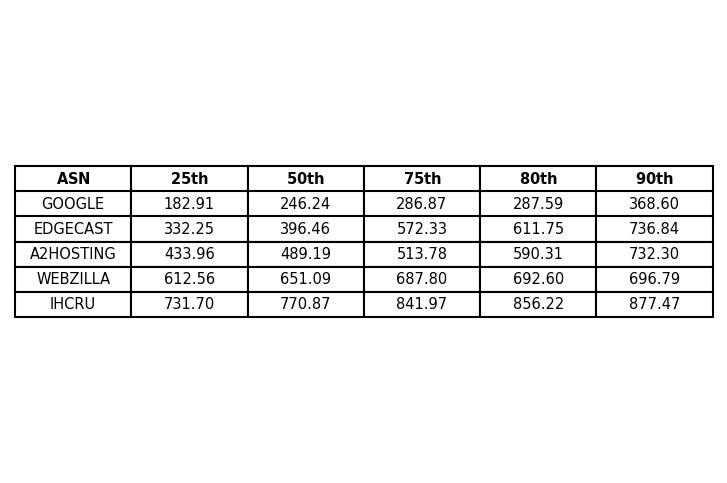

In [49]:
data = {'$\\bf{ASN}$': ['GOOGLE', 'EDGECAST', 'A2HOSTING', 'WEBZILLA', 'IHCRU'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x4.Percentile(25)), "{:.2f}".format(x5.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x4.Percentile(50)), "{:.2f}".format(x5.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x4.Percentile(75)), "{:.2f}".format(x5.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x4.Percentile(80)), "{:.2f}".format(x5.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x4.Percentile(90)), "{:.2f}".format(x5.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./AWS/SaoPaulo/ASN/TTFB_ipv4_asno_percentile.png', format='png', bbox_inches='tight')

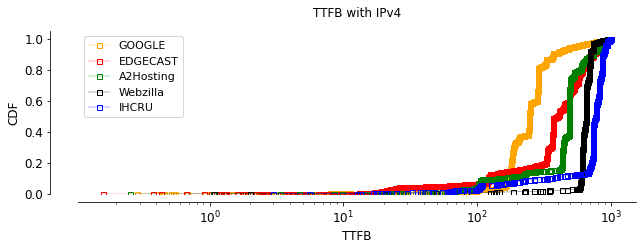

In [50]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15169
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#15133
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#55293
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#35415
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')
#203226
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['GOOGLE', 'EDGECAST', 'A2Hosting', 'Webzilla', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/SaoPaulo/ASN/TTFB_ipv4_asno.png', format='png', bbox_inches='tight')

In [51]:
x = Cdf.MakeCdfFromList(quic15169['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic15133['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic55293['TotalDownloadTime'].values)
x4 = Cdf.MakeCdfFromList(quic35415['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quic203226['TotalDownloadTime'].values)

In [52]:
print_percentiles(x1, 'quic15133')
print_percentiles(x3, 'quic55293')
print_percentiles(x4, 'quic35415')
print_percentiles(x5, 'quic203226')
print_percentiles(x, 'quic15169')

-----------------------------

percentile values distribution for quic15133

50th Percentile:555.889000

90th Percentile:898.622000

99th Percentile:982.874000

25th Percentile:285.342000

75th Percentile:746.371000

20th Percentile:555.889000

40th Percentile:898.622000

60th Percentile:982.874000

80th Percentile:285.342000

-----------------------------

-----------------------------

percentile values distribution for quic55293

50th Percentile:529.850000

90th Percentile:862.396000

99th Percentile:980.458000

25th Percentile:444.701000

75th Percentile:695.540000

20th Percentile:529.850000

40th Percentile:862.396000

60th Percentile:980.458000

80th Percentile:444.701000

-----------------------------

-----------------------------

percentile values distribution for quic35415

50th Percentile:733.029000

90th Percentile:938.690000

99th Percentile:980.188000

25th Percentile:622.438000

75th Percentile:865.059000

20th Percentile:733.029000

40th Percentile:938.690000

60th Pe

In [53]:
write_percentiles('quic15133.csv', x1)
write_percentiles('quic55293.csv', x3)
write_percentiles('quic35415.csv', x4)
write_percentiles('quic203226.csv', x5)
write_percentiles('quic15169.csv', x)

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


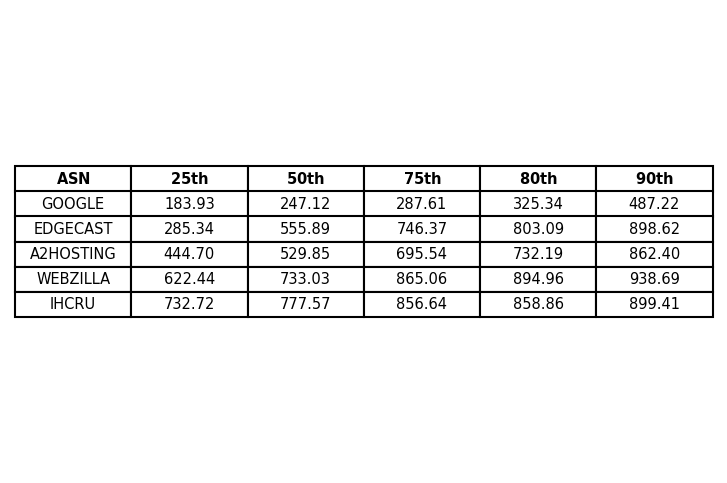

In [54]:
data = {'$\\bf{ASN}$': ['GOOGLE', 'EDGECAST', 'A2HOSTING', 'WEBZILLA', 'IHCRU'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x4.Percentile(25)), "{:.2f}".format(x5.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x4.Percentile(50)), "{:.2f}".format(x5.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x4.Percentile(75)), "{:.2f}".format(x5.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x4.Percentile(80)), "{:.2f}".format(x5.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x4.Percentile(90)), "{:.2f}".format(x5.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./AWS/SaoPaulo/ASN/TotalDownloadTime_ipv4_asno_percentile.png', format='png', bbox_inches='tight')

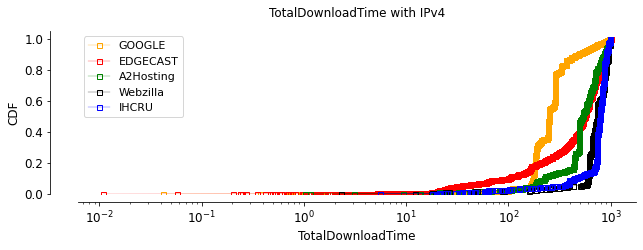

In [55]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15169
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#15133
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#55293
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#35415
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')
#203226
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['GOOGLE', 'EDGECAST', 'A2Hosting', 'Webzilla', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/SaoPaulo/ASN/TotalDownloadTime_ipv4_asno.png', format='png', bbox_inches='tight')

In [56]:
#GOOGLE
quic46 = quic15169.loc[t['Protocol'] == 'Q046']
quic43 = quic15169.loc[t['Protocol'] == 'Q043']
quic50 = quic15169.loc[t['Protocol'] == 'Q050']
quich24 = quic15169.loc[t['Protocol'] == 'FF000018']

In [57]:
x = Cdf.MakeCdfFromList(quic43['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic46['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic50['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quich24['ConnectionEstablishmentTime'].values)

In [58]:
print_percentiles(x1, 'Q046')
print_percentiles(x3, 'Q050')
#print_percentiles(x5, 'h24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q046

50th Percentile:158.924000

90th Percentile:165.787000

99th Percentile:775.810000

25th Percentile:95.668000

75th Percentile:161.940000

20th Percentile:158.924000

40th Percentile:165.787000

60th Percentile:775.810000

80th Percentile:95.668000

-----------------------------

-----------------------------

percentile values distribution for Q050

50th Percentile:158.953000

90th Percentile:165.783000

99th Percentile:795.477000

25th Percentile:95.550000

75th Percentile:162.026000

20th Percentile:158.953000

40th Percentile:165.783000

60th Percentile:795.477000

80th Percentile:95.550000

-----------------------------

-----------------------------

percentile values distribution for Q043

50th Percentile:159.123000

90th Percentile:165.893000

99th Percentile:732.704000

25th Percentile:95.566000

75th Percentile:161.972000

20th Percentile:159.123000

40th Percentile:165.893000

60th Percentile:732.704000


findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


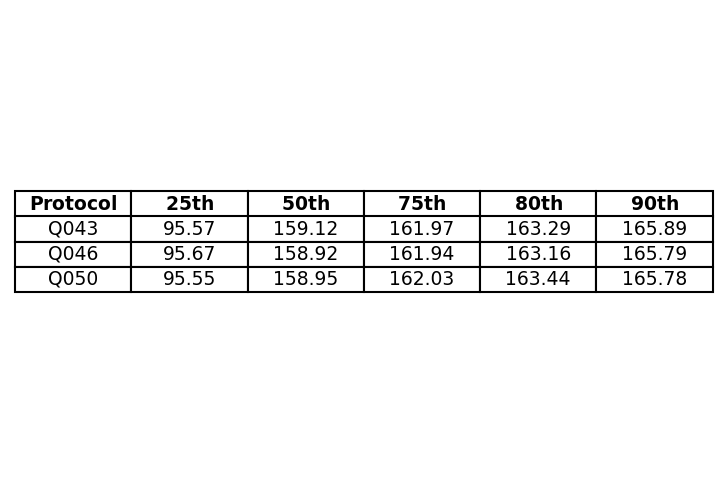

In [59]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./AWS/SaoPaulo/ASN/handshake_times_ipv4_asn15169_percentile.png', format='png', bbox_inches='tight')

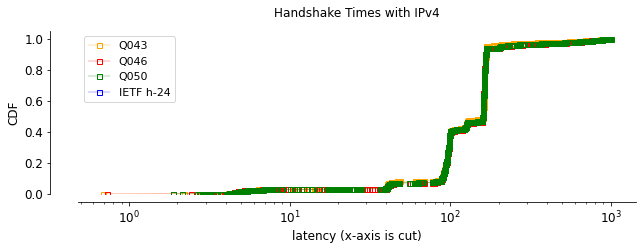

In [60]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Qh24
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050', 'IETF h-24'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/SaoPaulo/ASN/handshake_times_ipv4_asn15169.png', format='png', bbox_inches='tight')


In [61]:
x = Cdf.MakeCdfFromList(quic43['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic46['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic50['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quich24['TTFB'].values)

In [62]:
print_percentiles(x1, 'Q046')
print_percentiles(x3, 'Q050')
#print_percentiles(x5, 'h24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q046

50th Percentile:245.568000

90th Percentile:368.270000

99th Percentile:880.774000

25th Percentile:182.013000

75th Percentile:286.156000

20th Percentile:245.568000

40th Percentile:368.270000

60th Percentile:880.774000

80th Percentile:182.013000

-----------------------------

-----------------------------

percentile values distribution for Q050

50th Percentile:245.565000

90th Percentile:368.364000

99th Percentile:883.222000

25th Percentile:181.732000

75th Percentile:286.109000

20th Percentile:245.565000

40th Percentile:368.364000

60th Percentile:883.222000

80th Percentile:181.732000

-----------------------------

-----------------------------

percentile values distribution for Q043

50th Percentile:246.953000

90th Percentile:371.792000

99th Percentile:859.038000

25th Percentile:185.298000

75th Percentile:287.440000

20th Percentile:246.953000

40th Percentile:371.792000

60th Percentile:859.03

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


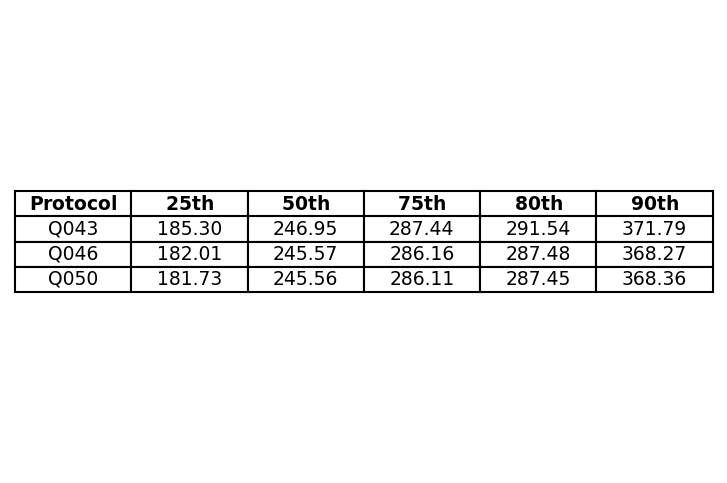

In [63]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90))]
        }   

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./AWS/SaoPaulo/ASN/handshake_times_ipv4_asn15169_percentile.png', format='png', bbox_inches='tight')

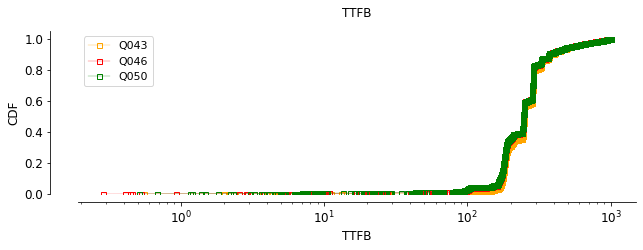

In [64]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#h24
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB', fontsize=12, y=1.05)
plt.savefig('./AWS/SaoPaulo/ASN/TTFB_ipv4_asn15169.png', format='png', bbox_inches='tight')


In [65]:
x = Cdf.MakeCdfFromList(quic43['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic46['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic50['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quich24['TotalDownloadTime'].values)

In [66]:
print_percentiles(x1, 'Q046')
print_percentiles(x3, 'Q050')
#print_percentiles(x5, 'h24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q046

50th Percentile:246.821000

90th Percentile:488.642000

99th Percentile:920.302000

25th Percentile:183.269000

75th Percentile:287.417000

20th Percentile:246.821000

40th Percentile:488.642000

60th Percentile:920.302000

80th Percentile:183.269000

-----------------------------

-----------------------------

percentile values distribution for Q050

50th Percentile:246.764000

90th Percentile:474.209000

99th Percentile:928.074000

25th Percentile:182.782000

75th Percentile:287.363000

20th Percentile:246.764000

40th Percentile:474.209000

60th Percentile:928.074000

80th Percentile:182.782000

-----------------------------

-----------------------------

percentile values distribution for Q043

50th Percentile:248.164000

90th Percentile:488.355000

99th Percentile:917.088000

25th Percentile:186.156000

75th Percentile:287.950000

20th Percentile:248.164000

40th Percentile:488.355000

60th Percentile:917.08

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


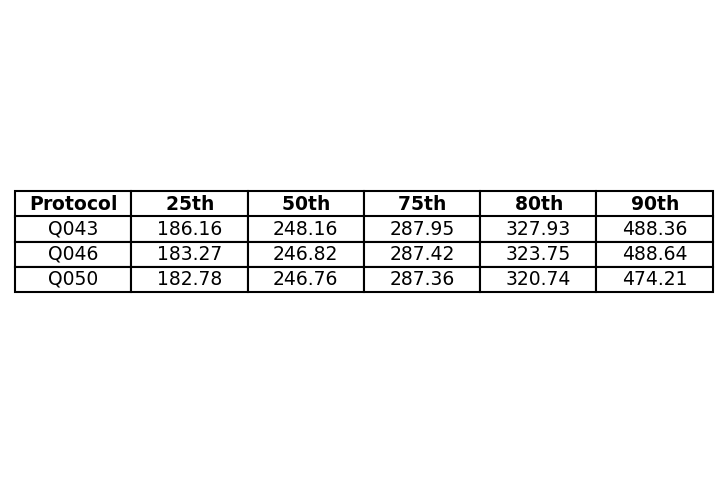

In [67]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90))]
        }   

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./AWS/SaoPaulo/ASN/total_download_time_ipv4_asn15169_percentile.png', format='png', bbox_inches='tight')

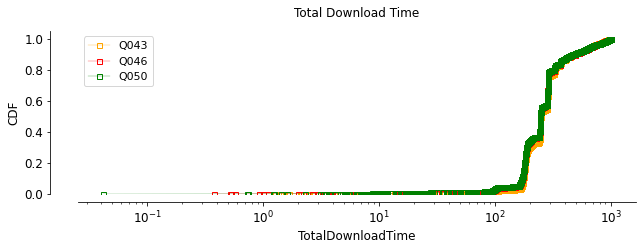

In [68]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#h24
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Total Download Time', fontsize=12, y=1.05)
plt.savefig('./AWS/SaoPaulo/ASN/total_download_time_ipv4_asn15169.png', format='png', bbox_inches='tight')


In [69]:
#Edgecast
quic44 = quic15133.loc[t['Protocol'] == 'Q046']
quic43 = quic15133.loc[t['Protocol'] == 'Q043']
quic39 = quic15133.loc[t['Protocol'] == 'Q050']
quic35 = quic15133.loc[t['Protocol'] == 'FF000018']

In [70]:
x = Cdf.MakeCdfFromList(quic43['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic46['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic50['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quich24['ConnectionEstablishmentTime'].values)

In [71]:
print_percentiles(x1, 'Q046')
print_percentiles(x3, 'Q050')
#print_percentiles(x5, 'h24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q046

50th Percentile:158.924000

90th Percentile:165.787000

99th Percentile:775.810000

25th Percentile:95.668000

75th Percentile:161.940000

20th Percentile:158.924000

40th Percentile:165.787000

60th Percentile:775.810000

80th Percentile:95.668000

-----------------------------

-----------------------------

percentile values distribution for Q050

50th Percentile:158.953000

90th Percentile:165.783000

99th Percentile:795.477000

25th Percentile:95.550000

75th Percentile:162.026000

20th Percentile:158.953000

40th Percentile:165.783000

60th Percentile:795.477000

80th Percentile:95.550000

-----------------------------

-----------------------------

percentile values distribution for Q043

50th Percentile:242.193000

90th Percentile:248.947000

99th Percentile:372.860000

25th Percentile:219.001000

75th Percentile:246.828000

20th Percentile:242.193000

40th Percentile:248.947000

60th Percentile:372.860000

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


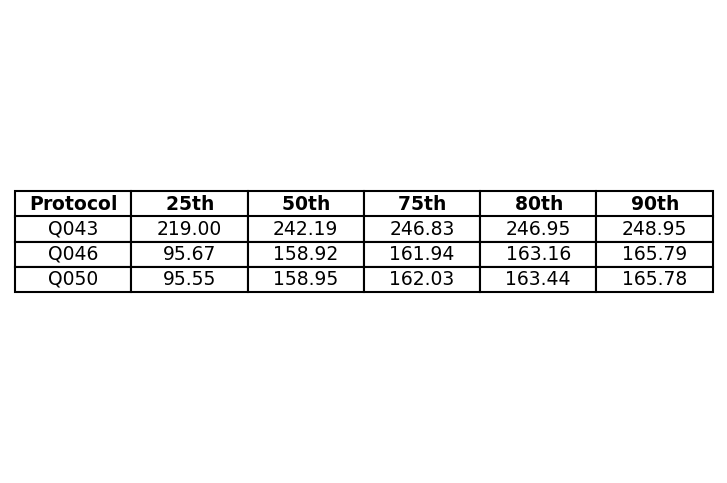

In [72]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90))]
        }   

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./AWS/SaoPaulo/ASN/handshake_times_ipv4_asn15133_percentile.png', format='png', bbox_inches='tight')

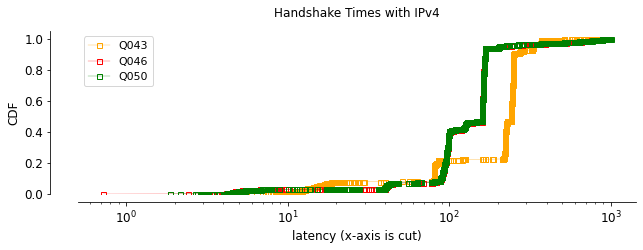

In [73]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#h24
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/SaoPaulo/ASN/handshake_times_ipv4_asn15133.png', format='png', bbox_inches='tight')


In [74]:
x = Cdf.MakeCdfFromList(quic43['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic46['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic50['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quich24['TTFB'].values)

In [75]:
print_percentiles(x1, 'Q046')
print_percentiles(x3, 'Q050')
#print_percentiles(x5, 'h24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q046

50th Percentile:245.568000

90th Percentile:368.270000

99th Percentile:880.774000

25th Percentile:182.013000

75th Percentile:286.156000

20th Percentile:245.568000

40th Percentile:368.270000

60th Percentile:880.774000

80th Percentile:182.013000

-----------------------------

-----------------------------

percentile values distribution for Q050

50th Percentile:245.565000

90th Percentile:368.364000

99th Percentile:883.222000

25th Percentile:181.732000

75th Percentile:286.109000

20th Percentile:245.565000

40th Percentile:368.364000

60th Percentile:883.222000

80th Percentile:181.732000

-----------------------------

-----------------------------

percentile values distribution for Q043

50th Percentile:423.810000

90th Percentile:775.355000

99th Percentile:960.986000

25th Percentile:335.107000

75th Percentile:606.825000

20th Percentile:423.810000

40th Percentile:775.355000

60th Percentile:960.98

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


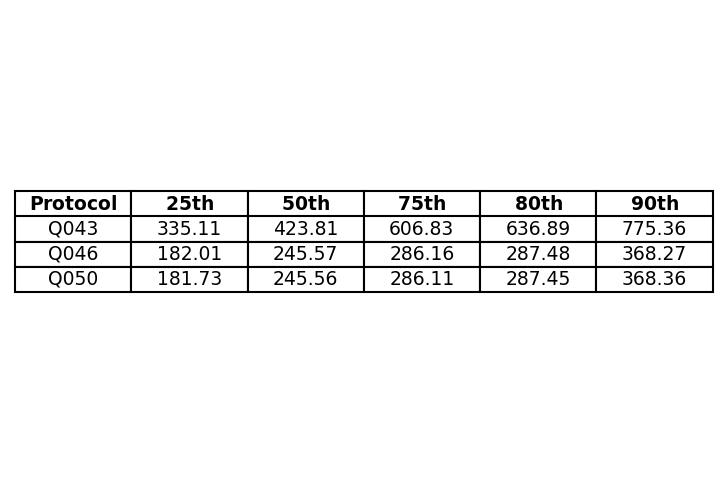

In [76]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90))]
        }   

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./AWS/SaoPaulo/ASN/TTFB_ipv4_asn15133_percentile.png', format='png', bbox_inches='tight')


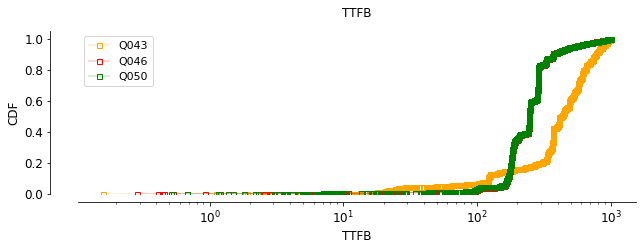

In [77]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#h4
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB', fontsize=12, y=1.05)
plt.savefig('./AWS/SaoPaulo/ASN/TTFB_ipv4_asn15133.png', format='png', bbox_inches='tight')


In [78]:
x = Cdf.MakeCdfFromList(quic43['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic46['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic50['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quich24['TotalDownloadTime'].values)

In [79]:
print_percentiles(x1, 'Q046')
print_percentiles(x3, 'Q050')
#print_percentiles(x5, 'h24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q046

50th Percentile:246.821000

90th Percentile:488.642000

99th Percentile:920.302000

25th Percentile:183.269000

75th Percentile:287.417000

20th Percentile:246.821000

40th Percentile:488.642000

60th Percentile:920.302000

80th Percentile:183.269000

-----------------------------

-----------------------------

percentile values distribution for Q050

50th Percentile:246.764000

90th Percentile:474.209000

99th Percentile:928.074000

25th Percentile:182.782000

75th Percentile:287.363000

20th Percentile:246.764000

40th Percentile:474.209000

60th Percentile:928.074000

80th Percentile:182.782000

-----------------------------

-----------------------------

percentile values distribution for Q043

50th Percentile:550.360000

90th Percentile:902.437000

99th Percentile:984.163000

25th Percentile:242.795000

75th Percentile:775.582000

20th Percentile:550.360000

40th Percentile:902.437000

60th Percentile:984.16

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


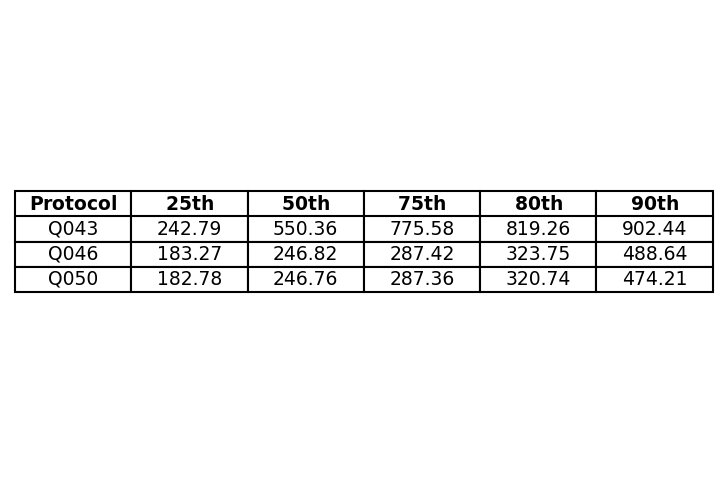

In [80]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90))]
        }   

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./AWS/SaoPaulo/ASN/Total_Download_time_ipv4_asn15133_percentile.png', format='png', bbox_inches='tight')

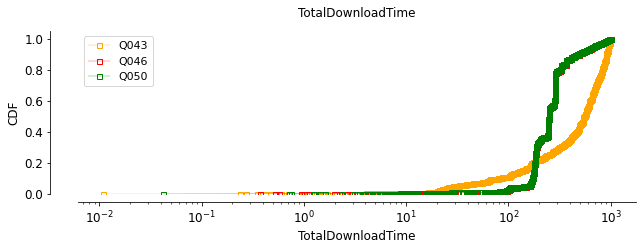

In [81]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#h24
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime', fontsize=12, y=1.05)
plt.savefig('./AWS/SaoPaulo/ASN/Total_Download_time_ipv4_asn15133.png', format='png', bbox_inches='tight')



In [82]:
# IHCRU - Internet-Hosting Ltd
quic203226 = quic4.loc[t['ASNo'] == 203226]
quic46 = quic203226.loc[t['Protocol'] == 'Q046']
quic43 = quic203226.loc[t['Protocol'] == 'Q043']
quic50 = quic203226.loc[t['Protocol'] == 'Q050']
quich24 = quic203226.loc[t['Protocol'] == 'FF000018']

In [83]:
x = Cdf.MakeCdfFromList(quic43['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic46['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic50['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quich24['ConnectionEstablishmentTime'].values)

print_percentiles(x1, 'Q046')
print_percentiles(x3, 'Q050')
print_percentiles(x5, 'h24')
print_percentiles(x, 'Q043')

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


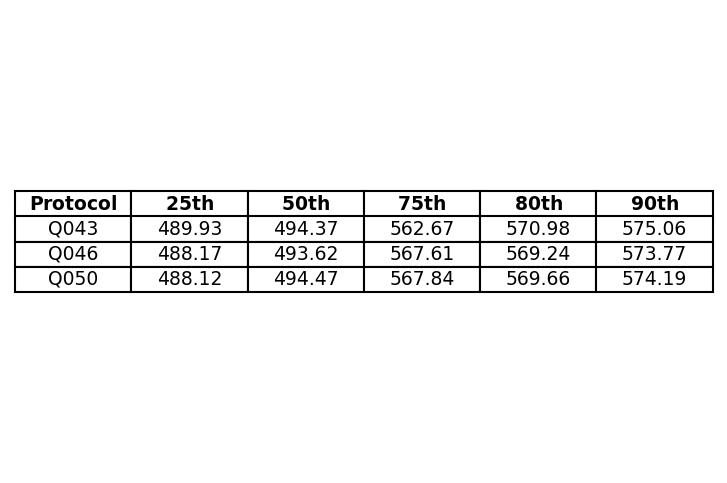

In [84]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./AWS/SaoPaulo/ASN/handshake_times_ipv4_asn203226_percentile.png', format='png', bbox_inches='tight')

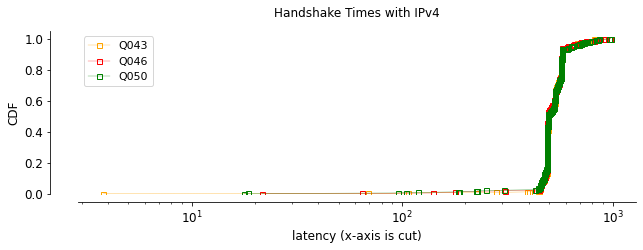

In [85]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#h24
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/SaoPaulo/ASN/handshake_times_ipv4_asn203226.png', format='png', bbox_inches='tight')


In [86]:
x = Cdf.MakeCdfFromList(quic43['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic46['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic50['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quich24['TTFB'].values)

In [87]:
print_percentiles(x1, 'Q046')
print_percentiles(x3, 'Q050')
#print_percentiles(x5, 'h24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q046

50th Percentile:770.461000

90th Percentile:896.245000

99th Percentile:967.591000

25th Percentile:731.690000

75th Percentile:845.147000

20th Percentile:770.461000

40th Percentile:896.245000

60th Percentile:967.591000

80th Percentile:731.690000

-----------------------------

-----------------------------

percentile values distribution for Q050

50th Percentile:773.243000

90th Percentile:860.967000

99th Percentile:950.350000

25th Percentile:730.993000

75th Percentile:839.924000

20th Percentile:773.243000

40th Percentile:860.967000

60th Percentile:950.350000

80th Percentile:730.993000

-----------------------------

-----------------------------

percentile values distribution for Q043

50th Percentile:755.488000

90th Percentile:878.663000

99th Percentile:982.038000

25th Percentile:733.032000

75th Percentile:828.602000

20th Percentile:755.488000

40th Percentile:878.663000

60th Percentile:982.03

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


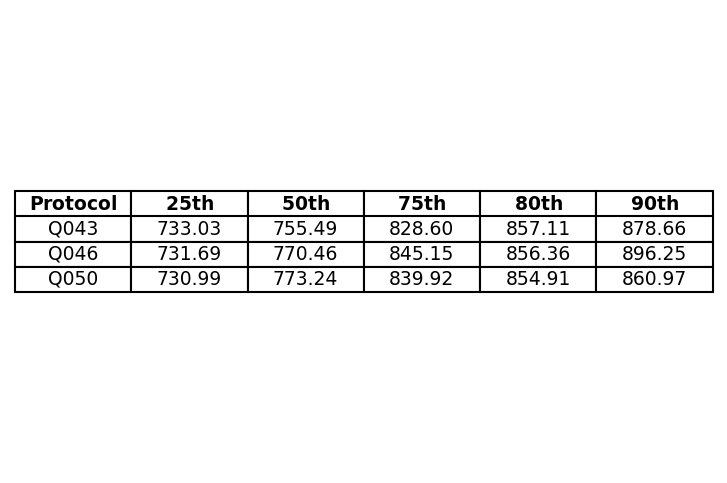

In [88]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./AWS/SaoPaulo/ASN/ttfb_ipv4_asn203226_percentile.png', format='png', bbox_inches='tight')

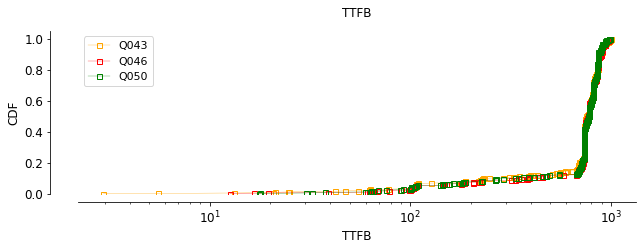

In [89]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q=h24
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB', fontsize=12, y=1.05)
plt.savefig('./AWS/SaoPaulo/ASN/ttfb_ipv4_asn203226.png', format='png', bbox_inches='tight')


In [90]:
x = Cdf.MakeCdfFromList(quic43['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic46['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic50['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quich24['TotalDownloadTime'].values)

In [91]:
print_percentiles(x1, 'Q046')
print_percentiles(x3, 'Q050')
#print_percentiles(x5, 'h24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q046

50th Percentile:777.570000

90th Percentile:906.512000

99th Percentile:982.117000

25th Percentile:732.659000

75th Percentile:857.075000

20th Percentile:777.570000

40th Percentile:906.512000

60th Percentile:982.117000

80th Percentile:732.659000

-----------------------------

-----------------------------

percentile values distribution for Q050

50th Percentile:778.108000

90th Percentile:897.150000

99th Percentile:981.508000

25th Percentile:732.254000

75th Percentile:856.528000

20th Percentile:778.108000

40th Percentile:897.150000

60th Percentile:981.508000

80th Percentile:732.254000

-----------------------------

-----------------------------

percentile values distribution for Q043

50th Percentile:777.148000

90th Percentile:899.775000

99th Percentile:983.963000

25th Percentile:733.341000

75th Percentile:855.599000

20th Percentile:777.148000

40th Percentile:899.775000

60th Percentile:983.96

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


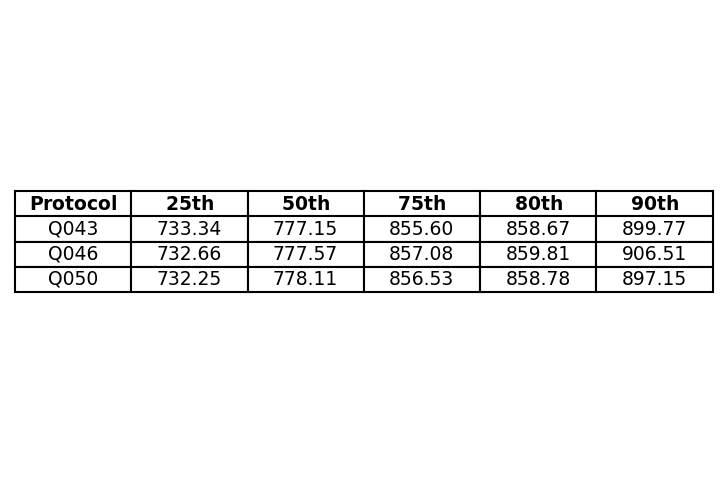

In [92]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./AWS/SaoPaulo/ASN/totaldownloadtime_ipv4_asn203226_percentile.png', format='png', bbox_inches='tight')


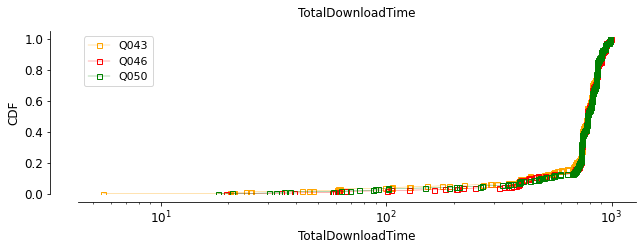

In [93]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#h24
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime', fontsize=12, y=1.05)
plt.savefig('./AWS/SaoPaulo/ASN/totaldownloadtime_ipv4_asn203226.png', format='png', bbox_inches='tight')
